In [2]:
import numpy as np
from pathlib import Path

In [36]:
trans_table = np.zeros((33,32))
first_noteArray = np.zeros(33)
#trans_table = transition_table_valueAdder(notes_values, trans_table)


In [89]:
def transition_table_valueAdder(note_array, trans_table=trans_table):
    """ 
    Function to update the first note table and the transition probability table
    Function will remove zeros for the note_array to simplify sorting
    Changes the open note (218) to 32 so that the table range is from 0-32
    
    INPUTS: note_array of the song, trans_table
    OUTPUTS: trans_table 
    """
    # Remove zeros from song note array
    note_array = note_array[note_array != 0]
    note_array[note_array == 218] = 32
    
    # update first_noteArray
    trans_table[32][int(note_array[0])-1] += 1 # adding first note to transition table

    # loop through note array and update trans_table - start with index 1
    for i in range(1, len(note_array)):
        trans_table[int(note_array[i-1]-1)][int(note_array[i])-1] += 1
    
    return trans_table


In [90]:
trans_table = np.zeros((33,32))
test = transition_table_valueAdder(notes, trans_table)

In [85]:
test.sum()

1179.0

In [86]:
trans_table[0]

array([47., 36.,  2.,  4.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [87]:
test[32]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
def prob_calc(array):
    new_array = np.nan_to_num(array/array.sum(axis=0))
    return (new_array)

In [39]:
training_path = Path.home()
training_path

PosixPath('/Users/forrestbrandt')

In [40]:
track_pack_path = Path('/Users/forrestbrandt/Documents/Berkeley/Fall_2021/TensorHero/Condensed Notes')
notes_path = Path('/Users/forrestbrandt/Documents/Berkeley/Fall_2021/TensorHero/Condensed Notes/Anti Hero 2/Trivium - Demon (Miscellany)')

In [63]:
notes = np.load(notes_path / 'notes_simplified.npy')

In [55]:
np.unique(notes)
print(notes.shape)


(21179,)


In [66]:

def create_trans_table(track_pack_path, trans_table):
    """
    Function that takes in a file path (in this case starting at Condensed Notes Folder - Track Pack) and an empty table 
    that navigates through the files and pulls data only from the note_simplified.npy file
    Function calls transition_table_valueAdder

    INPUTS: File path, empty table (needs to be generated before)
    OUTPUTS: returns transition table
    """
    for album in track_pack_path.iterdir():
        album_path = track_pack_path / album.name
        
        if album.is_file():
            if album.name == 'notes_simplified.npy':
                notes = np.load(album_path / 'notes_simplified.npy')
                trans_table = transition_table_valueAdder(notes, trans_table)
        if album.is_dir():
            for song in album.iterdir():
                notes_path = album_path / song.name
                if song.is_file():
                    if song.name == 'notes_simplified.npy':
                        notes = np.load(notes_path / 'notes_simplified.npy')
                        trans_table = transition_table_valueAdder(notes, trans_table)
                if song.is_dir():
                    for piece in song.iterdir():
                        piece_path = notes_path / piece.name
                        if piece.is_file():
                            if piece.name == 'notes_simplified.npy':
                                notes = np.load(notes_path / 'notes_simplified.npy')
                                trans_table = transition_table_valueAdder(notes, trans_table)
    return trans_table
    

In [91]:
track_pack_path = Path('/Users/forrestbrandt/Documents/Berkeley/Fall_2021/TensorHero/Condensed Notes')
trans_table = np.zeros((33,32))
trans_table = create_trans_table(track_pack_path,trans_table)
prob_table = prob_calc(trans_table)
prob_table.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
trans_table.sum(axis=1)[0]

1023.0

In [28]:
trans_table[2][0]

0.0

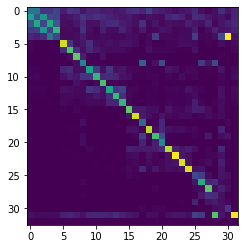

In [92]:
import matplotlib.pyplot as plt

plt.imshow(prob_table)

In [13]:
prob_table.shape

(33, 33)

In [30]:
# returns T/F on whether file exists 
# could be used for checking if need to go further into subdirectories
print(notes_path.exists())
# returns T/F if the subdirectory is a file
print(notes_path.is_file())

True
True


In [40]:
notes = np.load(notes_path / 'notes_simplified.npy')

In [50]:
first_note = {}

def find_first_note(note_array, dict=first_note):
    """ Function to find the first note in the note array
    INPUTS: Note array, dictionary consisting of first note counts
    OUTPUTS: Updated dictionary 
    """

    if note_array[0] not in dict:
        dict[note_array[0]] = 1
    else:
        dict[note_array[0]] += 1
    return dict


In [54]:
first_note = {}

def find_first_note(note_array, dict=first_note):
    """ Function to find the first note in the note array
    INPUTS: Note array, dictionary consisting of first note counts
    OUTPUTS: Updated dictionary 
    """

    for i in range(len(note_array)):
        if note_array[i] > 0:

            if note_array[i] not in dict:
                dict[note_array[i]] = 1
            else:
                dict[note_array[i]] += 1
            break
    return dict

In [162]:
def transition_table_valueAdder(note_array, first_note=first_noteArray, trans_table=trans_table):
    """ 
    Function to update the first note table and the transition probability table
    Function will remove zeros for the note_array to simplify sorting
    INPUTS: note_array of the song, first_noteArray, trans_table
    OUTPUTS: first_noteArray, trans_table 
    """
    # Remove zeros from song note array
    note_array = note_array[note_array != 0]
    note_array[note_array == 218] = 32
    
    # update first_noteArray
    first_note[int(note_array[0])-1] += 1
    trans_table[0][int(note_array[0])] += 1 # adding first note to transition table
    print(trans_table[0][int(note_array[0])])
    print(int(note_array[0]))

    # loop through note array and update trans_table - start with index 1
    for i in range(1, len(note_array)):
        trans_table[int(note_array[i-1])][int(note_array[i])] += 1
    
    return first_note, trans_table


In [163]:
trans_table = np.zeros((33,33))
first_noteArray = np.zeros(33)
first_noteArray, trans_table = transition_table_valueAdder(notes_values,first_noteArray, trans_table)
prob_table = prob_calc(trans_table)
prob_table.sum(axis=0)

1179
1.0
6


In [165]:
def probability_calc(array):
    
    """ Function that takes as input an array and calculates the probability of that event happening for each column
    INPUTS: numpy array - transition table
    OUTPUTS: numpy array - transition probability table
    
    """
    # create empty table
    dim = len(array)
    prob_table = np.zeros((dim,dim))

    # loop
    for i in range(dim):
        total = array[:][i].sum()
        if total > 0:
            for j in range(dim):
                prob_table[j][i] = (array[j][i])/(total)
                
        else:
            prob_table[:][i] = 0
    return prob_table

In [187]:
def prob_calc(array):
    new_array = np.nan_to_num(array/array.sum(axis=0))
    return (new_array)

In [93]:
table_prob = np.load('trans_prob_table.npy')
table_trans = np.load('transition_table_rawNums.npy')

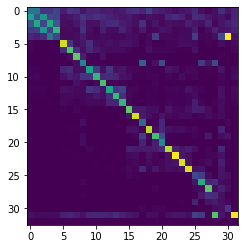

In [94]:

plt.imshow(table_prob)

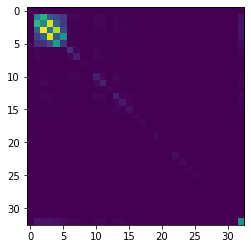

In [267]:
plt.imshow(table_trans)